## Analysis 3

1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?
2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot
3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot
4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\CHARISHMA\Advanced Data analysis project\autocsvstats.csv")

#### The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280557 entries, 0 to 280556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           280557 non-null  int64  
 1   dateCrawled          280557 non-null  object 
 2   name                 280557 non-null  object 
 3   seller               280557 non-null  object 
 4   offerType            280557 non-null  object 
 5   price                280557 non-null  int64  
 6   abtest               280557 non-null  object 
 7   vehicleType          280557 non-null  object 
 8   yearOfRegistration   280557 non-null  int64  
 9   gearbox              280557 non-null  object 
 10  powerPS              280557 non-null  float64
 11  model                280557 non-null  object 
 12  kilometer            280557 non-null  int64  
 13  monthOfRegistration  280557 non-null  int64  
 14  fuelType             280557 non-null  object 
 15  brand            

In [ ]:
we can reduce that by changing the datatypes

In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [11]:
df['price']=df['price'].astype('int16')
df['kilometer']=df['kilometer'].astype('int16')
df['monthOfRegistration']=df['monthOfRegistration'].astype('int16')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280557 entries, 0 to 280556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          280557 non-null  object 
 1   name                 280557 non-null  object 
 2   seller               280557 non-null  object 
 3   offerType            280557 non-null  object 
 4   price                280557 non-null  int16  
 5   abtest               280557 non-null  object 
 6   vehicleType          280557 non-null  object 
 7   yearOfRegistration   280557 non-null  int64  
 8   gearbox              280557 non-null  object 
 9   powerPS              280557 non-null  float64
 10  model                280557 non-null  object 
 11  kilometer            280557 non-null  int16  
 12  monthOfRegistration  280557 non-null  int16  
 13  fuelType             280557 non-null  object 
 14  brand                280557 non-null  object 
 15  dateCreated      

### What is the Average price of vehicle by fuel type and gearbox type.Give a plot

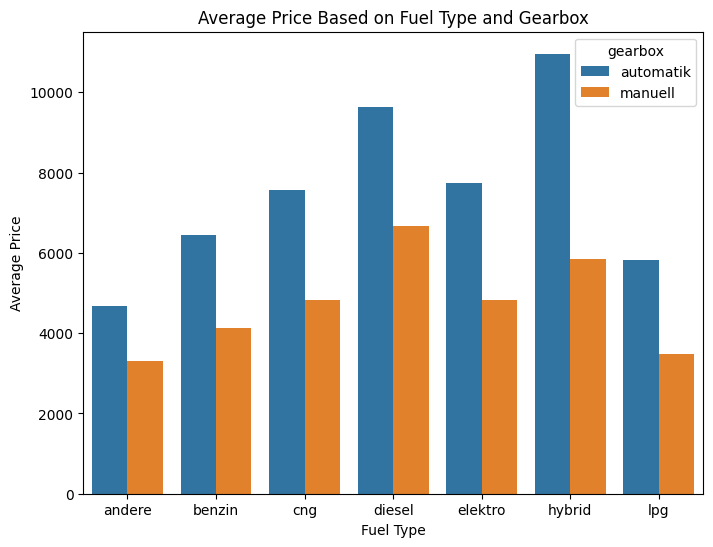

In [24]:
adata = df.groupby(['fuelType', 'gearbox'])['price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='fuelType', y='price', hue='gearbox', data=adata)
plt.title('Average Price Based on Fuel Type and Gearbox')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

* The average price of vehicle on the basis of fuel type and gearbox is hybrid is having highest average price
* andere is having lowest average price

### What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

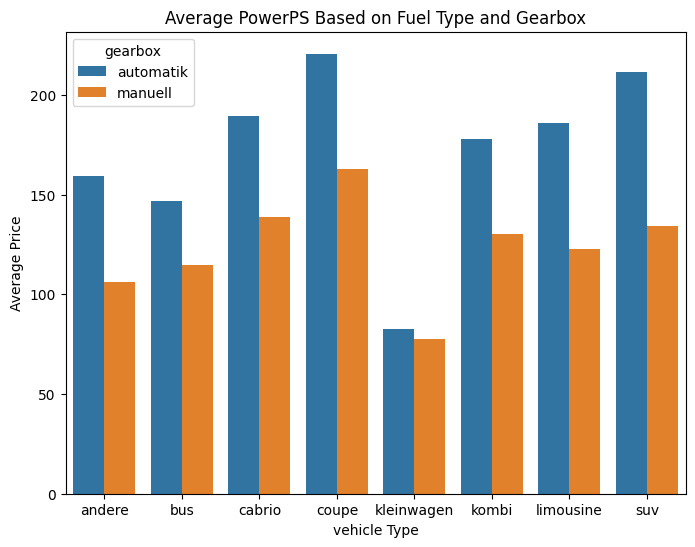

In [33]:
pdata = df.groupby(['vehicleType', 'gearbox'])['powerPS'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='vehicleType', y='powerPS', hue='gearbox', data=pdata)
plt.title('Average PowerPS Based on Fuel Type and Gearbox')
plt.xlabel('vehicle Type')
plt.ylabel('Average Price')
plt.show()

* The average of powerPS of vehicle on the basis of vehicle type and gearbox is coupe vehicle Type is having highest average price
* klewinwagen is having lowest average price

### What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

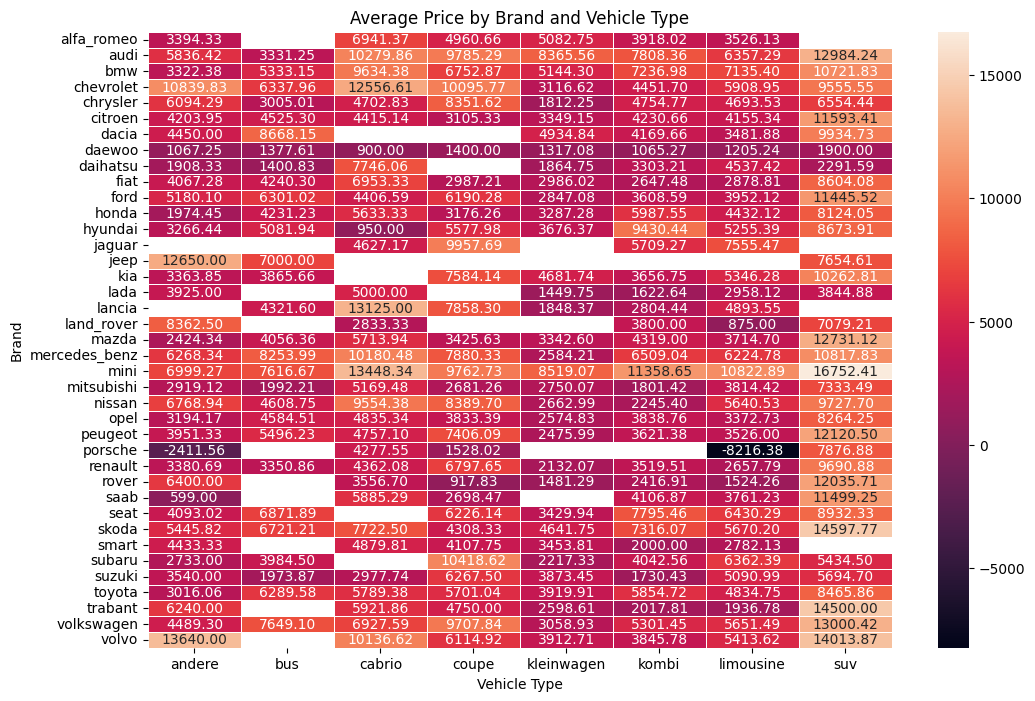

In [32]:
heatmap = df.groupby(['brand', 'vehicleType'])['price'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, fmt=".2f", linewidths=.5)
plt.xlabel('Vehicle Type')
plt.ylabel('Brand')
plt.title('Average Price by Brand and Vehicle Type')
plt.show()